In [33]:
import mne
import matplotlib.pyplot as plt
import numpy as np
from performRPCA import rpca
from performFilter import performFilter



""" preprocess
    Performs all the preprocessing algorithims on the EEG data
    
    Parameters
    ----------
    eeg : mne raw object
        First Parameter, EEG Data (must include)
    params: dict
        dictionary of all the parameters 
        params = {'line_noise' : 50 \
                'filter_type': None, \
                'filt_freq': None, \
                'filter_length': 'auto', \
                'eog_index': -1, \
                'lam': -1,
                'tol': 1e-7,
                'max_iter': 1000
                }
        values included are default 
    
    Returns
    -------
    Data : double numpy array
        Corrected Data
    fig : matlib figures
        Figures of the data at different processing stages        
    
"""

def preprocess(eeg, params):
    eeg.load_data()
    #performPrep
    badChannels =  ['Fc1.','Fp1.','Ft8.','T8..'] #prep_pipeline(eeg,params['line_noise'])
    eeg.info['bads'] = badChannels
    index = np.zeros(len(badChannels))
    index = index.astype(int) 
    

    
    #perfom filter
    eeg_filt = eeg.copy()
    eeg_filt._data = performFilter(eeg_filt.get_data(), eeg.info['sfreq'],\
                             params['filter_type'], \
                             params['filt_freq'],\
                             params['filter_length'])
    
    #eog_regression
    eeg_filt_eog = eeg_filt.copy()
    #eeg_filt_eog = performEOGRegression(raw_filt)
    
    #perform RPCA
    eeg_filt_eog_rpca = eeg_filt_eog.copy()
    eeg_filt_eog_rpca._data, noise = rpca(eeg_filt_eog.get_data(), \
                                    params['lam'], \
                                    params['tol'], \
                                    params['max_iter'])
    
    #Figures 
    
    fig1 = plt.figure(1)
    plt.setp(fig1,facecolor=[1,1,1],figwidth=15)
    ax = plt.gca()
    #EOG Graph
    if 'eog' in eeg:
        data = eeg.get_data()
        plt.imshow(data,aspect='auto',extent=[0,(data.shape[1]/eeg.info['sfreq']),63,0])
        plt.jet()
        scale_min = np.min(np.min(data))
        scale_max = np.max(np.max(data))
        plt.clim(scale_min,scale_max)
        plt.title('Filtered EOG data')
        plt.colorbar()
    else:
        plt.title('No EOG data available')
        params['eog_index'] = -1
    
    #EEG Filtered Plot
    fig2 = plt.figure(2)
    ax = plt.gca()
    plt.setp(fig2,facecolor=[1,1,1],figwidth=15)
    data = eeg_filt.get_data()
    plt.imshow(data,aspect='auto',extent=[0,(data.shape[1]/eeg.info['sfreq']),63,0])
    plt.jet()
    scale_min = np.min(np.min(data))
    scale_max = np.max(np.max(data))
    plt.clim(scale_min,scale_max)
    plt.colorbar()
    plt.title('Filtered EEG data')

    #EEG Filtered Plot Without Bad Channels
    fig3 = plt.figure(3)
    plt.setp(fig3,facecolor=[1,1,1],figwidth=15)
    allchan = raw.info['ch_names']
    
    #delete this next line (index) when performPrep is fully functional
    index = np.array([3,4,12,13,14,15,16,17,18,19,20,21,30,31,32,37,38,39,40,41,42,44,45,46,47,48,49,61,63,64])

    for i in range(len(index)): #len(badChannels)
        #index[i] = allchan.index(badChannels[i])
        eeg._data[(index[i]-1),:] = scale_min * np.ones((eeg._data.shape[1]))
    
    
    plt.imshow(eeg._data,aspect='auto',extent=[0,(data.shape[1]/eeg.info['sfreq']),63,0])
    plt.jet()
    scale_min = np.min(np.min(data))
    scale_max = np.max(np.max(data))
    plt.clim(scale_min,scale_max)
    plt.title('Detected bad channels')
    plt.colorbar()
    
    
    # Plot with EOG regression
    fig4 = plt.figure(4)
    plt.setp(fig4,facecolor=[1,1,1],figwidth=15)
    if params['eog_index'] >=0:
        data = eeg_filt_eog.get_data()
        data = np.delete(data, index,0)
        plt.imshow(data,aspect='auto',extent=[0,(data.shape[1]/eeg.info['sfreq']),63,0])
        plt.jet()
        scale_min = np.min(np.min(data))
        scale_max = np.max(np.max(data))
        plt.clim(scale_min,scale_max)
        plt.colorbar()
        plt.title('EOG regressed out')
    else:
        plt.title('No EOG-Regression requested')
    
    #RPCA Corrected Data Plot
    fig5 = plt.figure(5)
    plt.setp(fig5,facecolor=[1,1,1],figwidth=15)
    data = eeg_filt_eog_rpca.get_data()
    data = np.delete(data,index,0)
    plt.imshow(data,aspect='auto',extent=[0,(data.shape[1]/eeg.info['sfreq']),63,0])
    plt.jet()
    scale_min = np.min(np.min(data))
    scale_max = np.max(np.max(data))
    plt.clim(scale_min,scale_max)
    plt.colorbar()
    plt.title('Filtered EEG data')
    
    #RPCA Noisy Data Plot
    fig6 = plt.figure(6)
    plt.setp(fig6,facecolor=[1,1,1],figwidth=15)
    noise = np.delete(noise, index,0)
    plt.imshow(noise,aspect='auto',extent=[0,(data.shape[1]/eeg.info['sfreq']),63,0])
    plt.jet()
    scale_min = np.min(np.min(noise))
    scale_max = np.max(np.max(noise))
    #plt.clim(scale_min,scale_max)
    plt.colorbar()
    plt.title('Noise')
    
    

Extracting EDF parameters from /Users/raphaelbechtold/Documents/MATLAB/Automagic/automagic/data/Subj1/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 1057 samples (6.606 sec)



/Users/raphaelbechtold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:140: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/Users/raphaelbechtold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:152: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


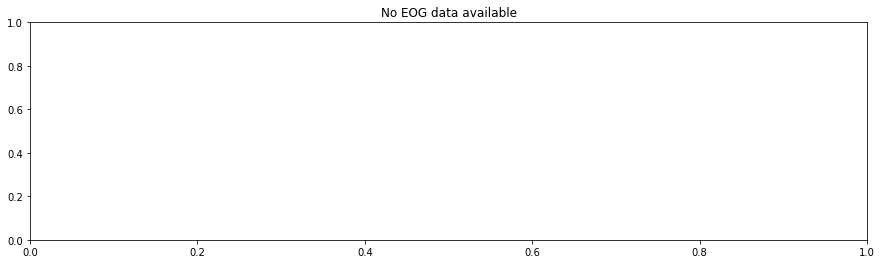

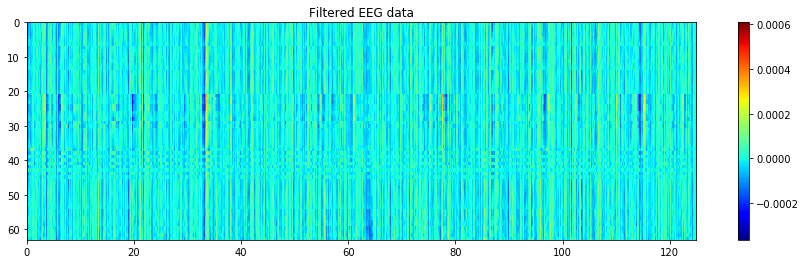

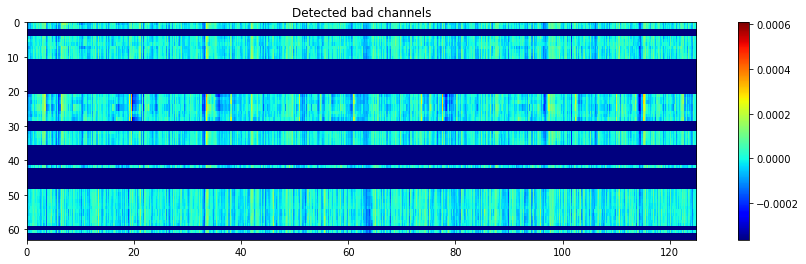

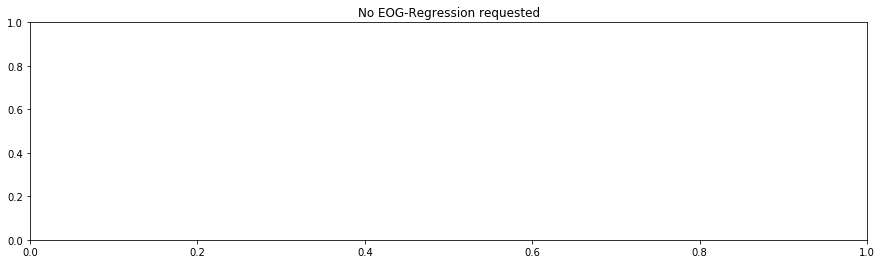

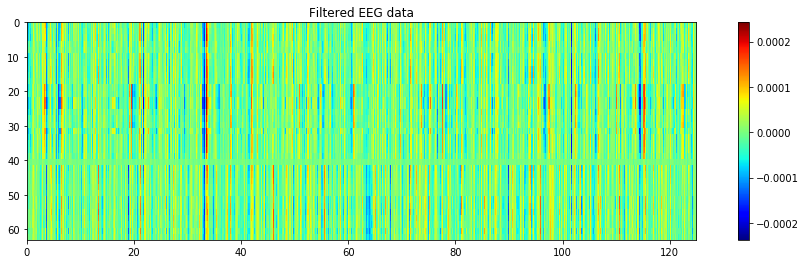

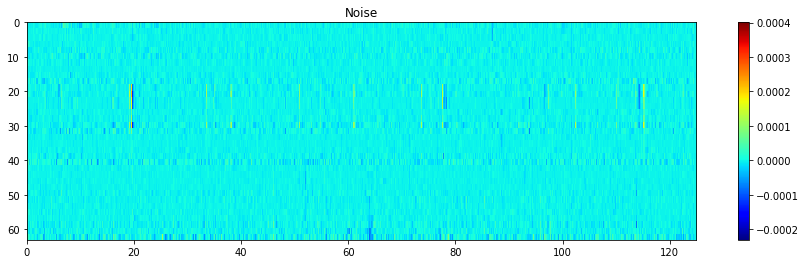

In [34]:
import mne
import matplotlib.pyplot as plt
import numpy as np
raw = mne.io.read_raw_edf('/Users/raphaelbechtold/Documents/MATLAB/Automagic/automagic/data/Subj1/S001R04.edf')
params = {'line_noise' : 50, \
          'filter_type' : 'high', \
          'filt_freq' : None, \
          'filter_length' : 'auto', \
          'eog_index' : -1, \
          'lam' : -1,
          'tol' : 1e-7,
          'max_iter': 1000
         }

preprocess(raw, params)
